# Matrix element LM plotting routines demo

28/11/19

Source [notebook on Github](https://github.com/phockett/ePSproc/blob/pkg/epsproc/tests/ePSproc_BM_calc_demo_Sept2019.ipynb).

## Basic IO

In [1]:
import sys
import os
import time
import numpy as np

# For module testing, include path to module here
modPath = r'D:\code\github\ePSproc'
sys.path.append(modPath)
import epsproc as ep

* pyevtk not found, VTK export not available. 


In [2]:
# Load data from modPath\data
dataPath = os.path.join(modPath, 'data', 'photoionization')
dataFile = os.path.join(dataPath, 'n2_3sg_0.1-50.1eV_A2.inp.out')  # Set for sample N2 data for testing

# Scan data dir
dataSet = ep.readMatEle(fileBase = dataPath)  

*** ePSproc readMatEle(): scanning files for DumpIdy segments.

*** Scanning dir
D:\code\github\ePSproc\data\photoionization
Found 2 .out file(s)


*** Reading ePS output file:  D:\code\github\ePSproc\data\photoionization\n2_3sg_0.1-50.1eV_A2.inp.out
Expecting 51 energy points.
Expecting 2 symmetries.
Scanning CrossSection segments.
Expecting 102 DumpIdy segments.
Found 102 dumpIdy segments (sets of matrix elements).

Processing segments to Xarrays...
Processed 102 sets of DumpIdy file segments, (0 blank)

*** Reading ePS output file:  D:\code\github\ePSproc\data\photoionization\no2_demo_ePS.out
Expecting 1 energy points.
Expecting 3 symmetries.
Scanning CrossSection segments.
Expecting 3 DumpIdy segments.
Found 3 dumpIdy segments (sets of matrix elements).

Processing segments to Xarrays...
Processed 3 sets of DumpIdy file segments, (0 blank)


## Basic plotting

As shown in the [basic demo notebook](https://epsproc.readthedocs.io/en/latest/ePSproc_demo_Aug2019/ePSproc_demo_Aug2019.html), basic plotting with Xarray functionality is a quick and easy way to plot matrix elements.

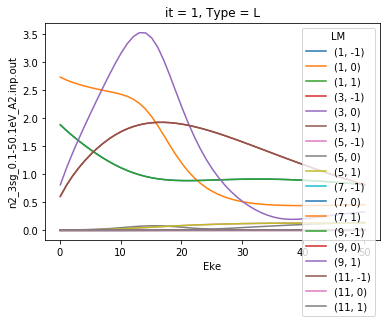

In [9]:
# Plot matrix elements using Xarray functionality
daPlot = dataSet[0].sum('mu').sum('Sym').sel({'Type':'L'}).squeeze()
daPlot.pipe(np.abs).plot.line(x='Eke');

For more control, additional preprocessing with thresholding & selection can be used.

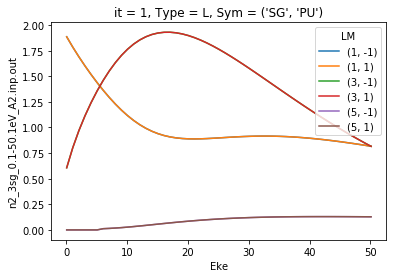

In [16]:
selDims = {'Type':'L','Cont':'PU'}
daPlot = ep.matEleSelector(dataSet[0], thres=1e-2, inds = selDims, sq = True)
daPlot.pipe(np.abs).sum('mu').plot.line(x='Eke');

... or faceting ...

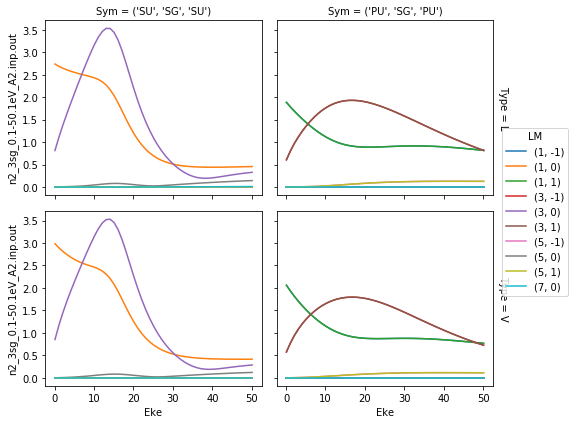

In [19]:
# Plot with faceting on symmetry
daPlot = ep.matEleSelector(dataSet[0], thres=1e-2, dims = 'Eke', sq = True).sum('mu').squeeze()
daPlot.pipe(np.abs).plot.line(x='Eke', col='Sym', row='Type');

## Plotting maps with lmPlot

For complex multidimensional cases line plots get busy, quickly.  A nice alternative is provided by [Seaborn's Clustermap](https://seaborn.pydata.org/examples/structured_heatmap.html), which produces a 2D map of values (i.e. a heatmap or image), with additional dimensional information as a side-bar.  This is now implemented in `ep.lmPlot()`.

Plotting data n2_3sg_0.1-50.1eV_A2.inp.out, pType=a, thres=0.01, with Seaborn


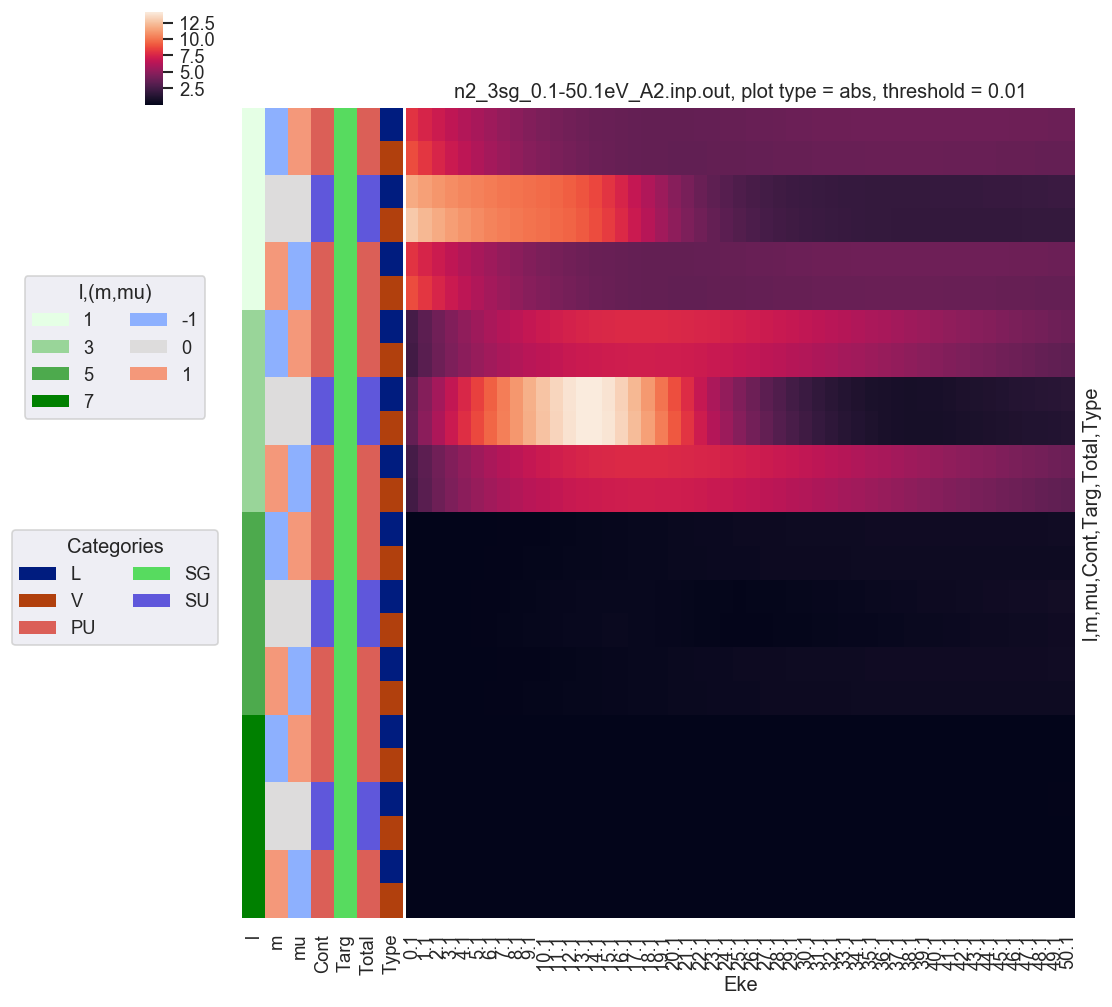

In [3]:
# Plot with sensible defaults - all dims
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(dataSet[0])

In order to use Seaborn, the data is converted from a multidimensional Xarray to a 2D Pandas array.  This displays nicely in Jupyter, so is also handy for inspecting values.

In [5]:
daPlotpd

Eke                                0.1        1.1        2.1        3.1   \
l m  mu Cont Targ Total Type                                               
1 -1  1 PU   SG   PU    L      8.143443   7.593716   7.103404   6.660060   
                        V      8.900023   8.224738   7.627702   7.095200   
   0  0 SU   SG   SU    L     11.823354  11.429458  11.111935  10.849149   
                        V     12.883046  12.311423  11.824577  11.410811   
   1 -1 PU   SG   PU    L      8.143443   7.593716   7.103404   6.660060   
                        V      8.900023   8.224738   7.627702   7.095200   
3 -1  1 PU   SG   PU    L      2.620714   3.416440   4.071325   4.629875   
                        V      2.484140   3.291182   3.949586   4.494447   
   0  0 SU   SG   SU    L      3.513428   4.719556   5.785863   6.766306   
                        V      3.682143   4.976274   6.086735   7.067816   
   1 -1 PU   SG   PU    L      2.620714   3.416440   4.071325   4.629875   
                        V      2.484140   3.291182   3.949586   4.494447   
5 -1  1 PU   SG   PU    L      0.003993   0.013835   0.021033   0.026999   
                        V      0.002819   0.010751   0.017869   0.026216   
   0  0 SU   SG   SU    L      0.006473   0.021244   0.032261   0.041993   
                        V      0.005091   0.017458   0.027707   0.039802   
   1 -1 PU   SG   PU    L      0.003993   0.013835   0.021033   0.026999   
                        V      0.002819   0.010751   0.017869   0.026216   
7 -1  1 PU   SG   PU    L      0.000024   0.000158   0.000305   0.000394   
                        V      0.000025   0.000150   0.000266   0.000318   
   0  0 SU   SG   SU    L      0.000020   0.000145   0.000292   0.000373   
                        V      0.000022   0.000137   0.000240   0.000265   
   1 -1 PU   SG   PU    L      0.000024   0.000158   0.000305   0.000394   
                        V      0.000025   0.000150   0.000266   0.000318   

Eke                                4.1        5.1        6.1        7.1   \
l m  mu Cont Targ Total Type                                               
1 -1  1 PU   SG   PU    L      6.255712   5.885550   5.546815   5.238038   
                        V      6.617558   6.187859   5.801034   5.453317   
   0  0 SU   SG   SU    L     10.627257  10.437825  10.275304  10.134910   
                        V     11.061133  10.768451  10.526367  10.328033   
   1 -1 PU   SG   PU    L      6.255712   5.885550   5.546815   5.238038   
                        V      6.617558   6.187859   5.801034   5.453317   
3 -1  1 PU   SG   PU    L      5.118714   5.553100   5.941282   6.287526   
                        V      4.953052   5.345025   5.683818   5.978440   
   0  0 SU   SG   SU    L      7.695465   8.593950   9.472654  10.335015   
                        V      7.963633   8.806609   9.618839  10.413320   
   1 -1 PU   SG   PU    L      5.118714   5.553100   5.941282   6.287526   
                        V      4.953052   5.345025   5.683818   5.978440   
5 -1  1 PU   SG   PU    L      0.033004   0.039974   0.048709   0.059861   
                        V      0.036675   0.049162   0.063460   0.079409   
   0  0 SU   SG   SU    L      0.052580   0.065454   0.081763   0.102433   
                        V      0.055471   0.074663   0.097135   0.122785   
   1 -1 PU   SG   PU    L      0.033004   0.039974   0.048709   0.059861   
                        V      0.036675   0.049162   0.063460   0.079409   
7 -1  1 PU   SG   PU    L      0.000405   0.000362   0.000320   0.000354   
                        V      0.000325   0.000356   0.000461   0.000630   
   0  0 SU   SG   SU    L      0.000355   0.000266   0.000224   0.000373   
                        V      0.000252   0.000340   0.000552   0.000822   
   1 -1 PU   SG   PU    L      0.000405   0.000362   0.000320   0.000354   
                        V      0.000325   0.000356   0.000461   0.000630   

Eke                                8.1        

Various settings can be passed for more control over the plot.

**Example with**
- Selection on Type = L
- Thresholding type by % of max value
- Log10 scaling
- Extended figure size


Plotting data n2_3sg_0.1-50.1eV_A2.inp.out, pType=a, thres=0.08224737585639882, with Seaborn


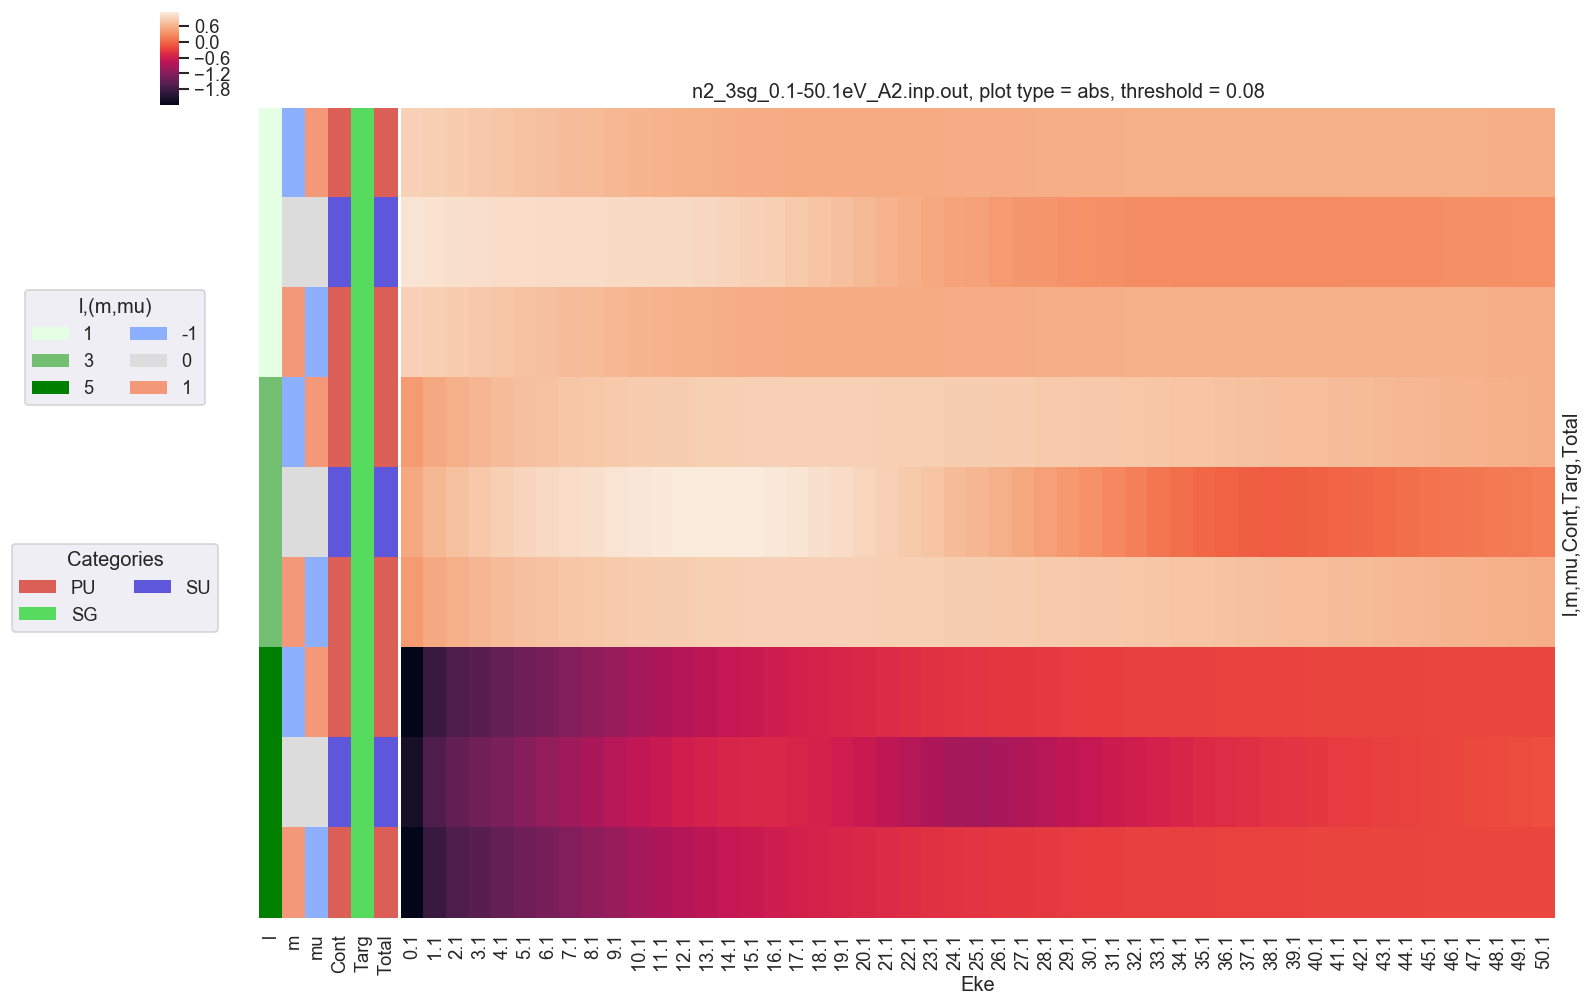

In [8]:
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(dataSet[0], selDims = {'Type':'L'}, 
                                               plotDims = ('l','m','mu','Cont','Targ','Total'), 
                                               thresType='pc', thres = 0.01, figsize = (15,10), logFlag = True)


**Example with**
- Selection on Type = L
- Sum over mu
- Thresholding type by % of max value
- Log10 scaling
- Extended figure size


Plotting data n2_3sg_0.1-50.1eV_A2.inp.out, pType=a, thres=0.08224737585639882, with Seaborn


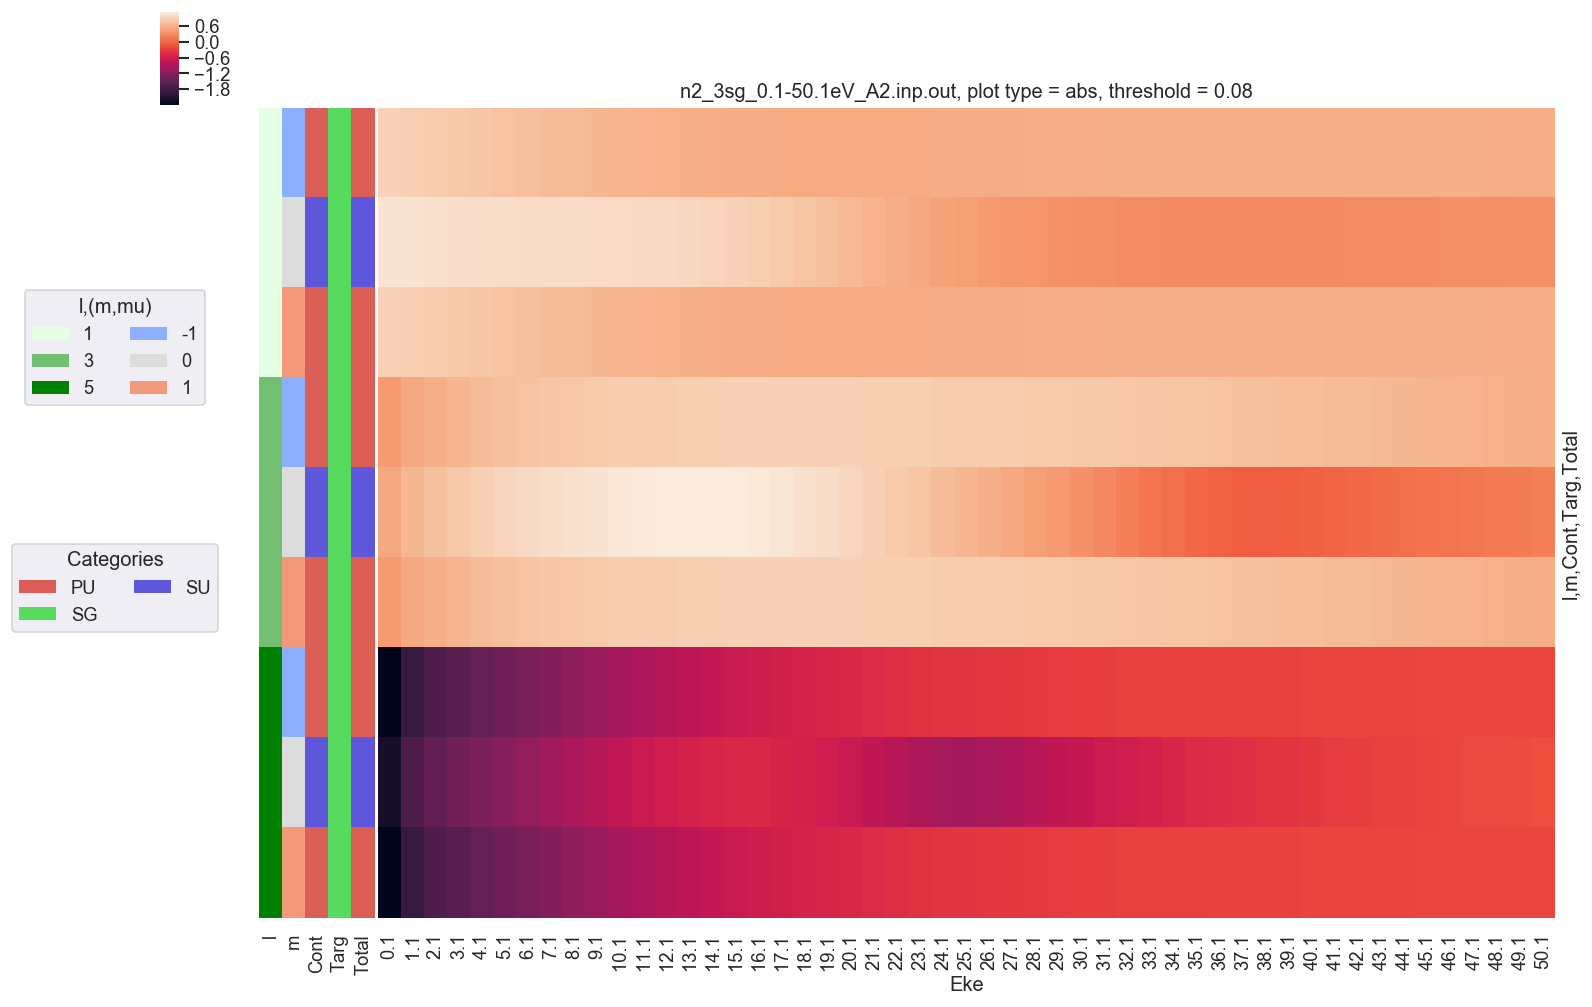

In [3]:
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(dataSet[0], selDims = {'Type':'L'}, sumDims = ['mu'],
                                               plotDims = ('l','m','Cont','Targ','Total'), 
                                               thresType='pc', thres = 0.01, figsize = (15,10), logFlag = True)

Various settings can be passed for more control over the plot.

**Example with**
- Selection on Type = L
- Thresholding type by % of max value
- Log10 scaling
- Extended figure size


Plotting data n2_3sg_0.1-50.1eV_A2.inp.out, pType=a, thres=0.08224737585639882, with Seaborn


No handles with labels found to put in legend.


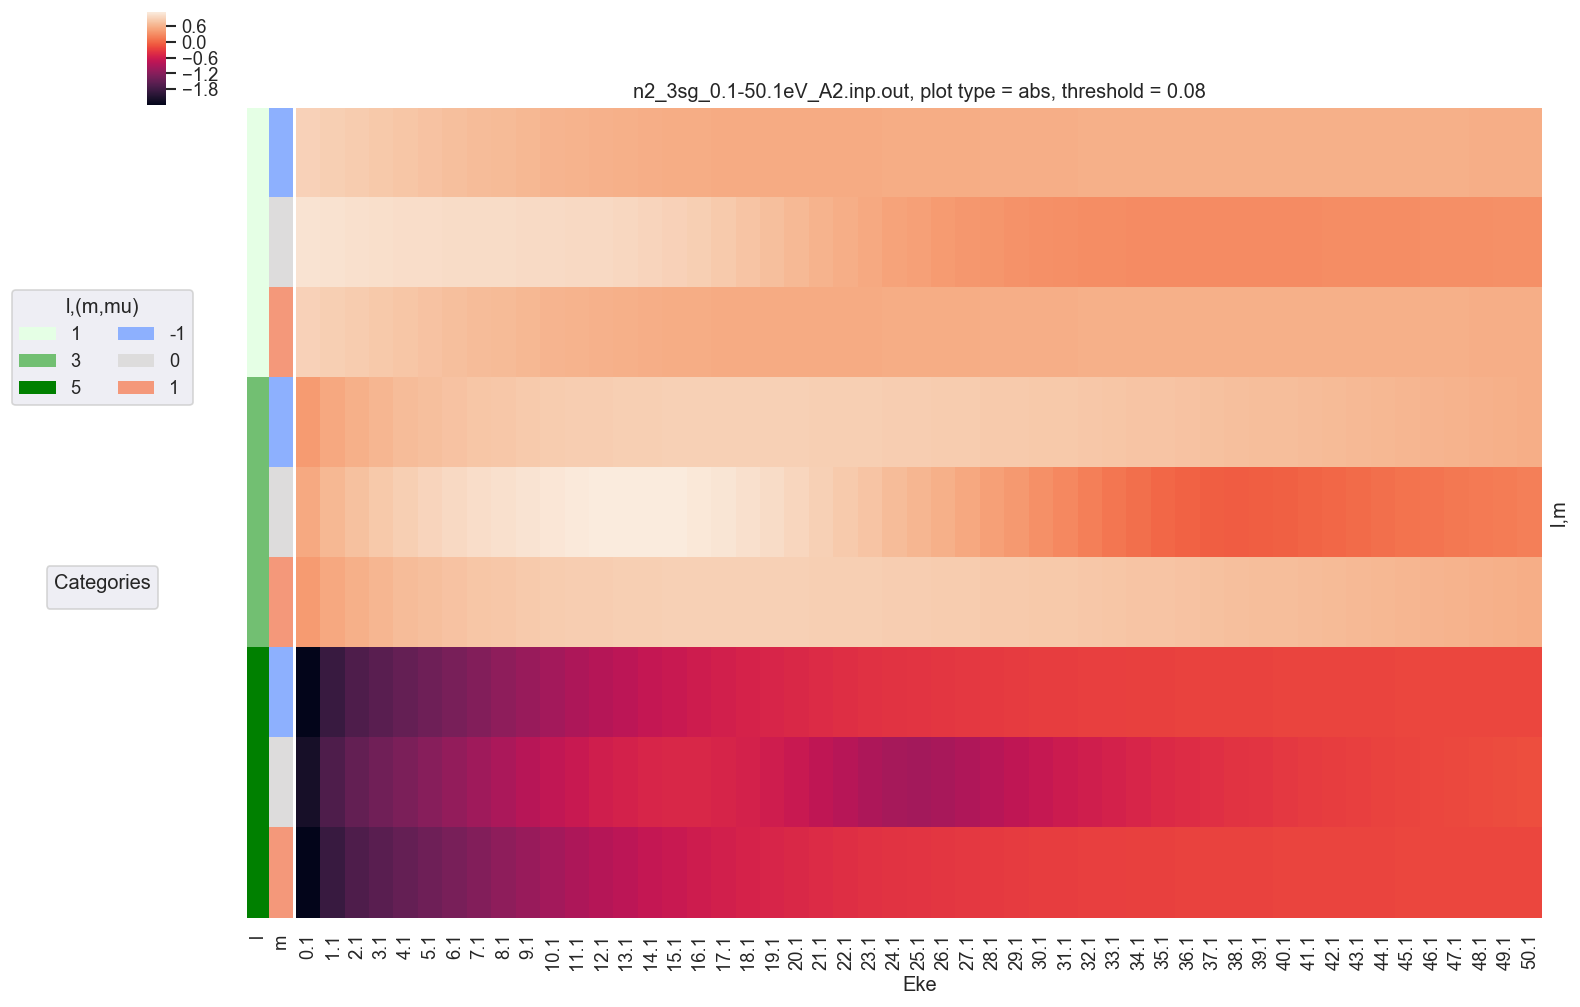

In [5]:
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(dataSet[0], selDims = {'Type':'L'}, sumDims = ['mu', 'Sym'],
                                               plotDims = ('l','m'), 
                                               thresType='pc', thres = 0.01, figsize = (15,10), logFlag = True)


**Example with**
- Changing the ordering of plotDims, here with 'm' as the main index.

Plotting data n2_3sg_0.1-50.1eV_A2.inp.out, pType=a, thres=0.08224737585639882, with Seaborn


No handles with labels found to put in legend.


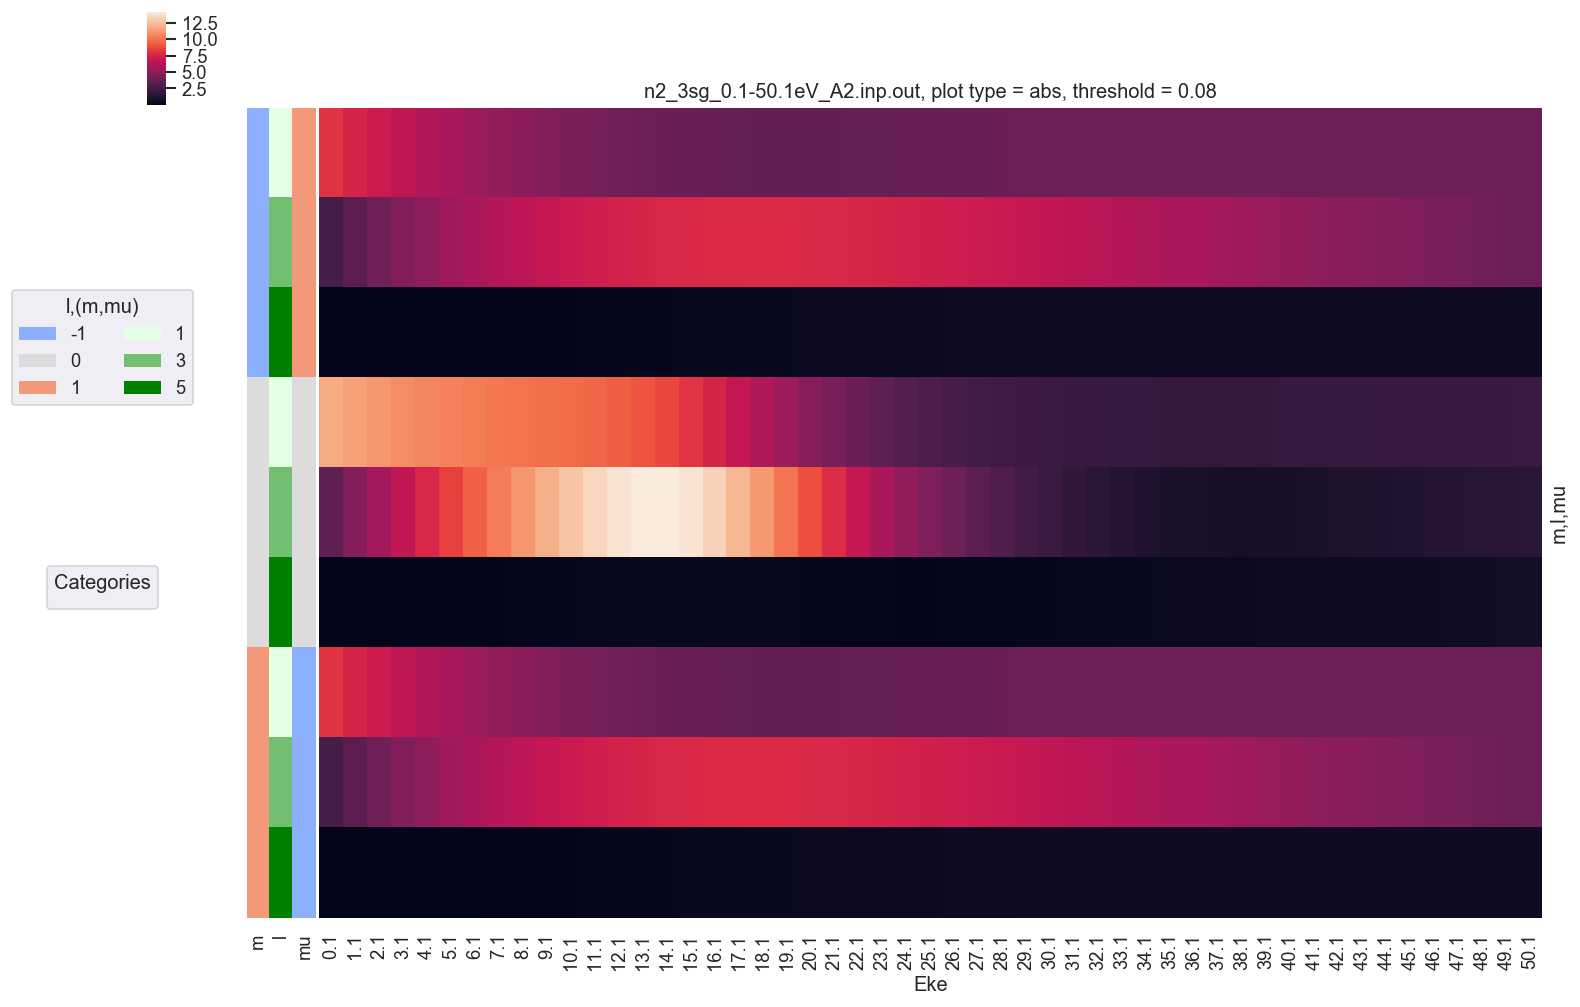

In [10]:
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(dataSet[0], selDims = {'Type':'L'}, sumDims = ['Sym'],
                                               plotDims = ('m','l','mu'), 
                                               thresType='pc', thres = 0.01, figsize = (15,10))

**Example with**
- Unwrapped phase plot

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\ePSdev\lib\site-packages\numpy\lib\function_base.py:1519: RuntimeWarning:

invalid value encountered in remainder

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\ePSdev\lib\site-packages\numpy\lib\function_base.py:1520: RuntimeWarning:

invalid value encountered in greater

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\ePSdev\lib\site-packages\numpy\lib\function_base.py:1522: RuntimeWarning:

invalid value encountered in less



Plotting data n2_3sg_0.1-50.1eV_A2.inp.out, pType=phaseUW, thres=0.5, with Seaborn


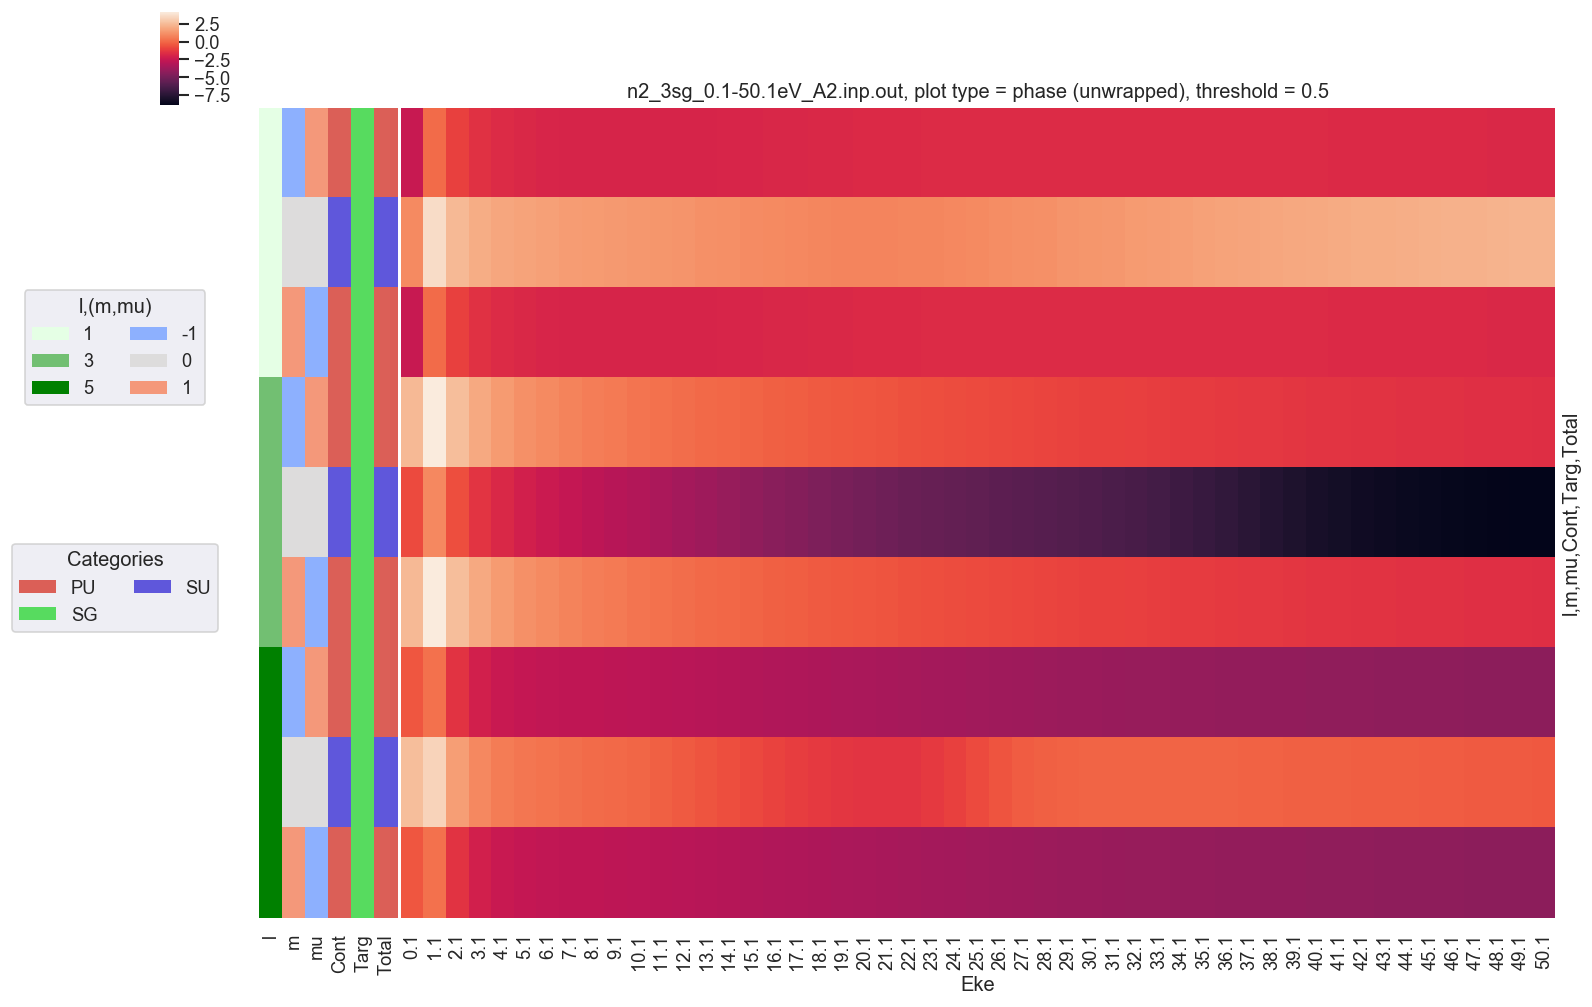

In [16]:
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(dataSet[0], selDims = {'Type':'L'}, 
                                               plotDims = ('l','m','mu','Cont','Targ','Total'), 
                                               thres = 0.5, figsize = (15,10), 
                                               pType = 'phaseUW')